In [5]:
import pandas as pd 
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='longitude', ylabel='latitude'>

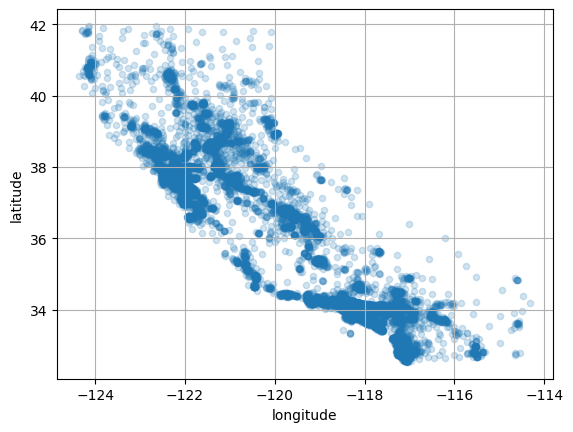

In [10]:
data.plot(kind='scatter',x='longitude',y='latitude',grid=True,alpha=0.2)

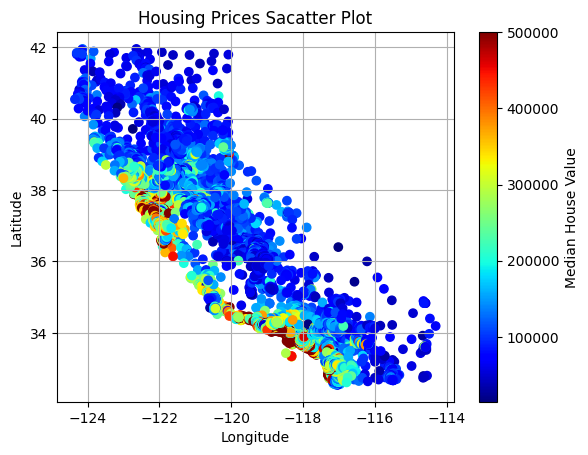

In [11]:
sc = plt.scatter(
    data['longitude'],
    data['latitude'],
    c=data['median_house_value'],
    cmap='jet',
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices Sacatter Plot')
plt.grid(True)
plt.colorbar(sc, label='Median House Value')
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

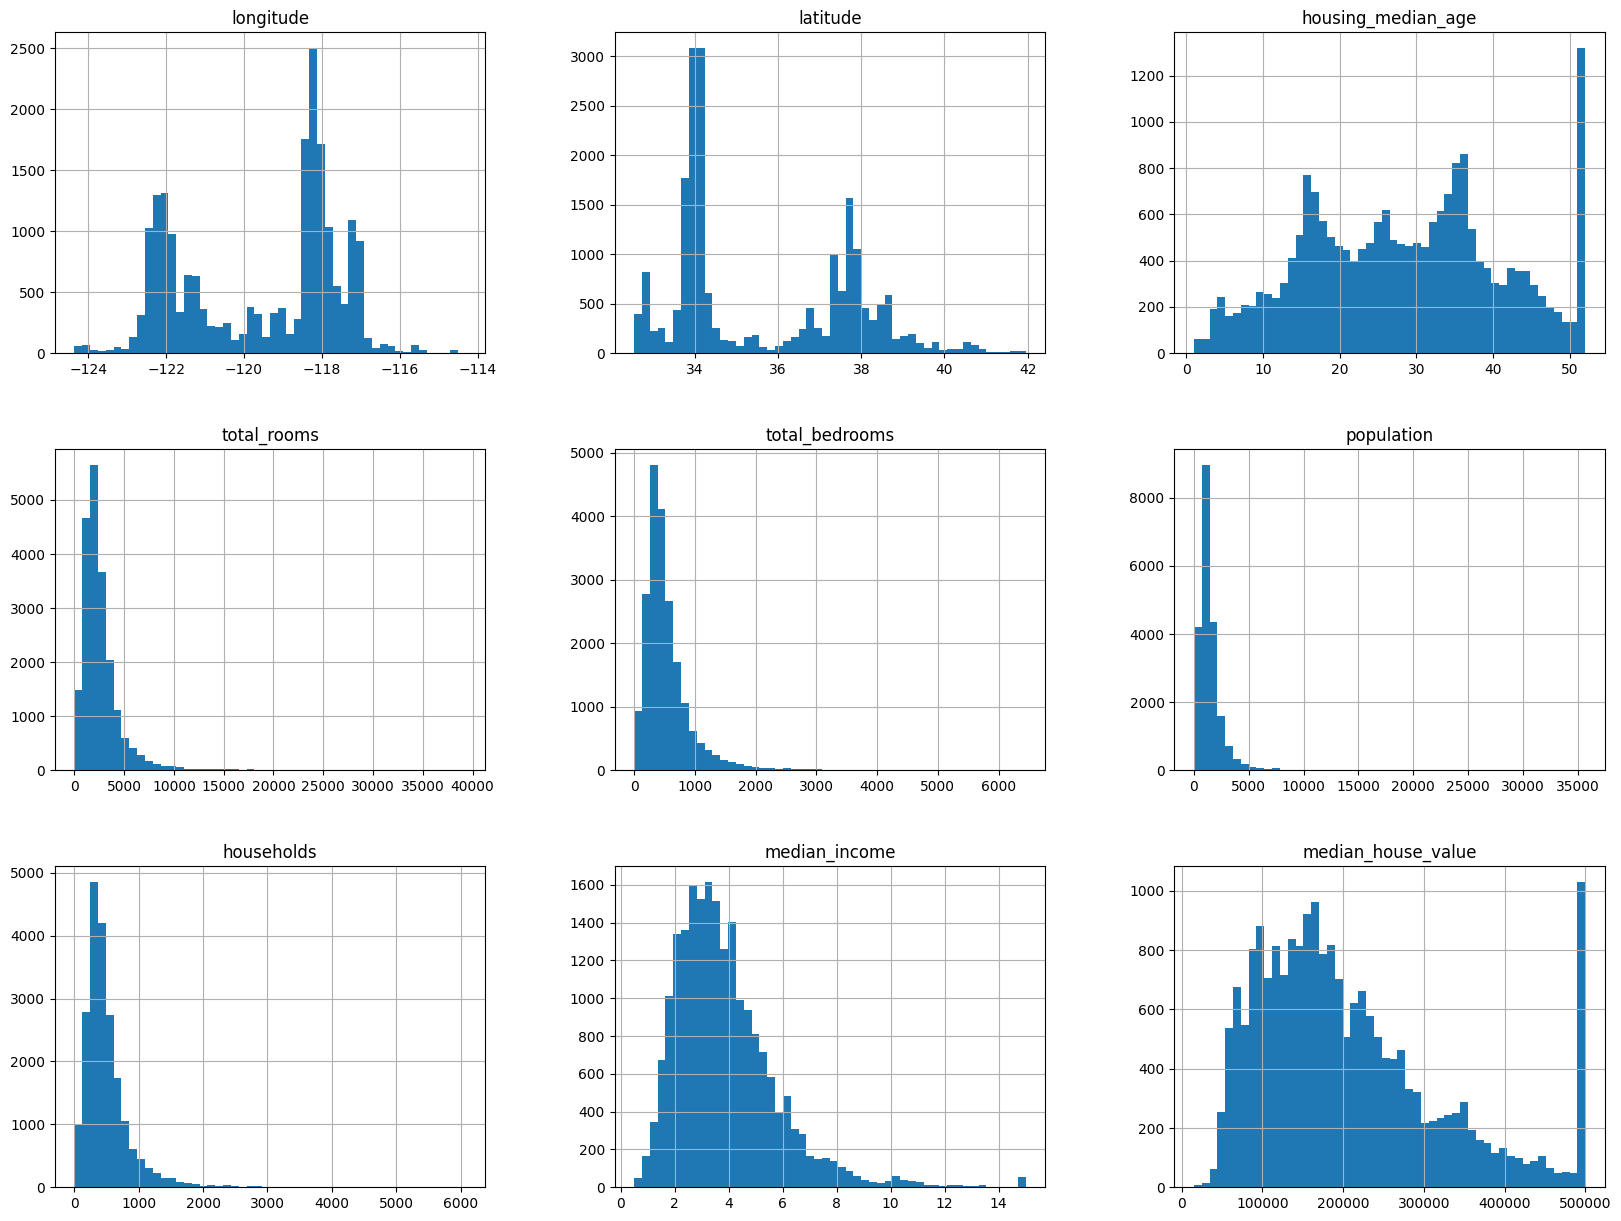

In [12]:
data.hist(bins=50, figsize=(20,15))

In [13]:
# We complete the missing values in "total_bedrooms" with the average value in that column
data["total_bedrooms"].fillna( data["total_bedrooms"].mean() , inplace= True )

/tmp/ipykernel_8413/4142625123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_bedrooms"].fillna( data["total_bedrooms"].mean() , inplace= True )


In [14]:
# We apply a one-hot-encoding in other only categorical data
prepared_data = pd.get_dummies(data= data , columns=["ocean_proximity"], dtype= int)
# For preventing multicolinearity we drop one of the new generated columns
prepared_data.drop(columns="ocean_proximity_ISLAND", inplace=True)
prepared_data["avg_rooms"] = prepared_data["total_rooms"] / prepared_data["households"]
prepared_data["beroom_ratio"] = prepared_data["total_bedrooms"] / prepared_data["total_rooms"]
prepared_data["people_per_home"] = prepared_data["population"] / prepared_data["households"]
prepared_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_rooms,beroom_ratio,people_per_home
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,5.329513,0.219892,2.123209


## Linear regression

In [15]:
X = prepared_data.drop(columns=["median_house_value","total_rooms","total_bedrooms"])
y = prepared_data["median_house_value"]

<Axes: >

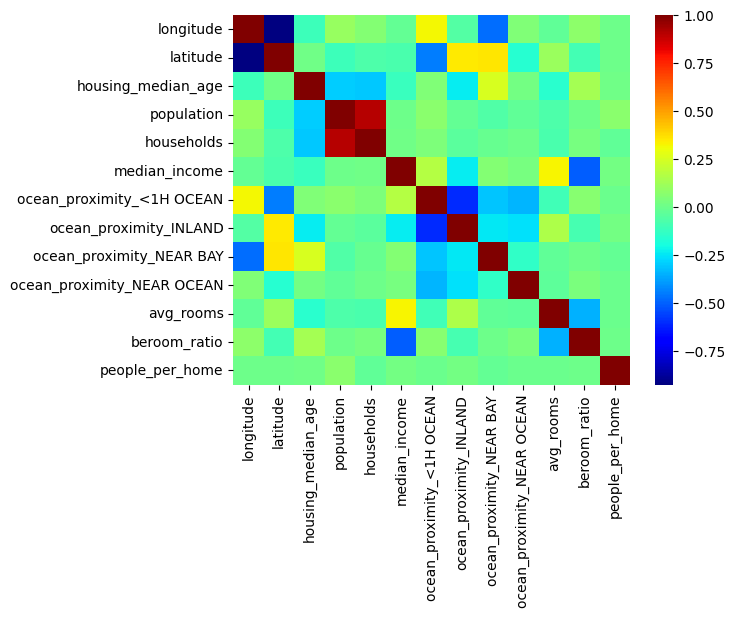

In [16]:
# lets plot a correlation matrix to find some possible correlation between variables
import seaborn as sns
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='jet' )

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Linear Regression

In [18]:
import statsmodels.api as sm
model = sm.OLS( y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2248.
Date:                Wed, 07 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:20:25   Log-Likelihood:            -1.9421e+05
No. Observations:               15480   AIC:                         3.884e+05
Df Residuals:                   15466   BIC:                         3.885e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.301e+06   1.09e+05    -21.089      0.000   -2.52e+06   -2.09e+06
longitude                  -2.822e+04   1168.225    -24.160      0.000   -3.05e+04   -2.59e+04
latitude                   -2.682e+04   1153.506    -23.249      0.000   -2.91e+04   -2.46e+04
housing_median_age          1093.7203     49.856     21.938      0.000     995.998    1191.443
population                   -40.0329      1.190    -33.654      0.000     -42.365     -37.701
households                   131.4642      3.559     36.937      0.000     124.488     138.441
median_income               4.057e+04    398.625    101.775      0.000    3.98e+04    4.14e+04
ocean_proximity_<1H OCEAN  -1.576e+05   3.93e+04     -4.011      0.000   -2.35e+05   -8.06e+04
ocean_proximity_INLAND     -1.912e+05   3.94e+04     -4.860      0.000   -2.68e+05   -1.14e+05
ocean_proximity_NEAR BAY   -1.618e+05   3.93e+04     -4.116      0.000   -2.39e+05   -8.48e+04
ocean_proximity_NEAR OCEAN -1.523e+05   3.93e+04     -3.875      0.000   -2.29e+05   -7.53e+04
avg_rooms                   2962.9393    245.365     12.076      0.000    2481.996    3443.883
beroom_ratio                 2.04e+05   1.17e+04     17.488      0.000    1.81e+05    2.27e+05
people_per_home              285.9406     85.062      3.362      0.001     119.209     452.673
==============================================================================
Omnibus:                     3798.412   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14341.183
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       7.073   Cond. No.                     4.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error

r2 = r2_score(y_test,y_pred)
RMSE = root_mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'root mean square error: {RMSE: .2}')
print(f"MAPE: {mape:.2%}")

R2: 0.8097277765402207
mean square error:  5e+04
MAPE: 18.49%


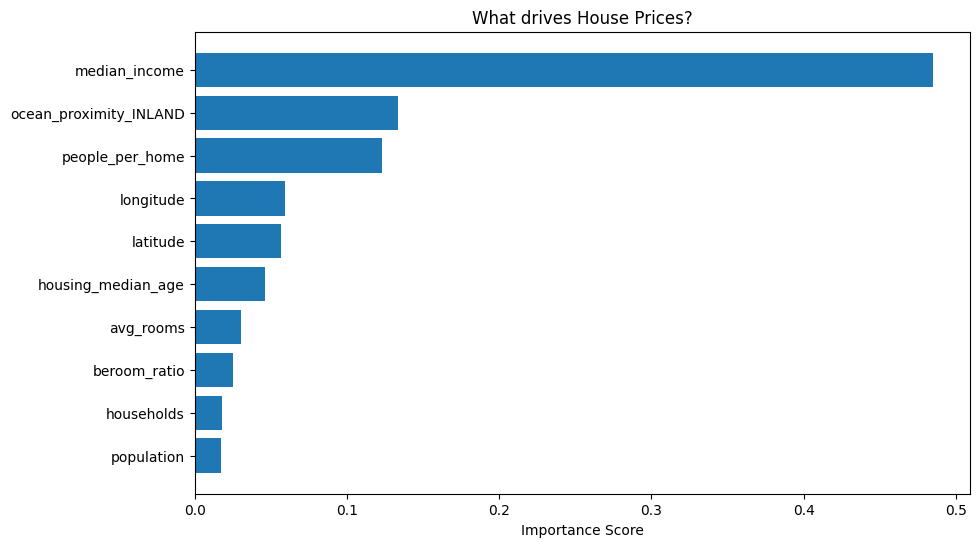

In [28]:
# Get feature importance from the trained model
importances = rfr.feature_importances_

# Create a DataFrame to view them easily
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Importance Score")
plt.gca().invert_yaxis() # Put the most important at the top
plt.title("What drives House Prices?")
plt.show()